<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=600 height=500/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Линейные алгоритмы</b></h3>


В этой домашке вы напишите свой класс логистической регрессии для бинарной классификации, а также логистическую регрессию с регуляризацией.

In [9]:
# Импорт библиотеки NumPy, которая предоставляет поддержку для работы с многомерными массивами и матрицами, а также функции для высокоуровневых математических операций
import numpy as np

# Импорт библиотеки Pandas для работы с табличными данными (DataFrames) и обработки больших наборов данных
import pandas as pd

# Импорт модуля linalg из библиотеки SciPy, предоставляющего функции для выполнения операций линейной алгебры, таких как разложение матриц, вычисление определителей и решение систем линейных уравнений
import scipy.linalg as sla

# Импорт библиотеки Matplotlib (подмодуля pyplot), которая используется для построения графиков и визуализации данных
import matplotlib.pyplot as plt

# Импорт подмодуля datasets из Scikit-learn, который содержит популярные наборы данных для тестирования и демонстрации моделей машинного обучения
from sklearn import datasets

# Импорт моделей линейной регрессии, Lasso-регрессии и Ridge-регрессии из модуля linear_model библиотеки Scikit-learn
# LinearRegression: классическая линейная регрессия
# Lasso: линейная регрессия с L1-регуляризацией, которая позволяет уменьшать коэффициенты до нуля (отбор признаков)
# Ridge: линейная регрессия с L2-регуляризацией, которая добавляет штраф за величину коэффициентов, что предотвращает переобучение
from sklearn.linear_model import LinearRegression, Lasso, Ridge



In [10]:
# Установка начального состояния для генератора случайных чисел в библиотеке NumPy с помощью метода seed().
# Это делает генерацию случайных чисел предсказуемой и воспроизводимой: при каждом запуске кода с одинаковым значением seed() будут получены одинаковые результаты.
# В данном случае используется число 42 в качестве "зерна" для инициализации генератора случайных чисел.
np.random.seed(42)

# Градиентный спуск: повторение

Рассмотрим функцию от двух переменных
$f(x, y) = \sin^2 x + \sin^2 y$  

In [11]:
def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    # Функция принимает параметр x, который является вектором длины 2 (двумерный массив NumPy, содержащий значения типа float).
    # Пример входного значения: np.array([1.0, 2.0])

    # Возвращаемое значение — это вещественное число (float), результат операции над элементами массива.

    # np.sin(x)**2: вычисляется синус для каждого элемента вектора x, затем синус возводится в квадрат.
    # np.sum: складывает полученные квадраты синусов всех элементов вектора x.
    return np.sum(np.sin(x)**2)

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

## Задание 1
Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [12]:
def grad_f(x):
    """
    Градиент функции f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    # Градиент функции f(x) = sum(sin(x)**2) можно найти как частные производные по каждому элементу вектора x.
    # Для sin(x)**2 производная по x равна 2 * sin(x) * cos(x), что упрощается до sin(2x).

    return 2 * np.sin(x) * np.cos(x)  # это эквивалентно np.sin(2 * x)

In [13]:
# Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение
assert np.allclose(grad_f(np.array([1, 2])),
                   np.array([0.90929743, -0.7568025])), "Что-то не так!"

In [15]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск к минимуму функции f от двух переменных.
    :param f: скалярная функция двух переменных
    :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная выше grad_f)
    :param lr: learning rate (шаг обучения) алгоритма
    :param num_iter: количество итераций градиентного спуска
    :param x0: начальная точка для спуска (если не указана, будет случайная)
    :return: np.array[num_iter, 2] пар вида (x, f(x)), где сохраняются шаги алгоритма
    """
    if x0 is None:
        x0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции в процессе град. спуска
    history = []

    # инициализация текущего значения x
    curr_x = x0.copy()

    # итерации цикла -- шаги градиентного спуска
    for iter_num in range(num_iter):
        # сохраняем текущие значения аргументов и значения функции f в history
        entry = np.hstack((curr_x, f(curr_x)))  # объединяем curr_x и f(curr_x) в один массив
        history.append(entry)

        # обновляем текущее значение x по правилу градиентного спуска
        curr_x -= lr * grad_f(curr_x)  # учитываем шаг lr и градиент в текущей точке

    return np.vstack(history)  # возвращаем историю всех шагов в виде двумерного массива

### Тестируем написанную функцию

In [16]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [17]:
steps

array([[3.74540119e-01, 9.50714306e-01, 7.96162814e-01],
       [3.06443570e-01, 8.56130580e-01, 6.61501405e-01],
       [2.48920419e-01, 7.57129527e-01, 5.32438585e-01],
       [2.01167461e-01, 6.57289308e-01, 4.13213611e-01],
       [1.62010673e-01, 5.60553766e-01, 3.08675973e-01],
       [1.30172552e-01, 4.70495524e-01, 2.22355696e-01],
       [1.04431147e-01, 3.89681303e-01, 1.55185446e-01],
       [8.36964420e-02, 3.19398688e-01, 1.05582063e-01],
       [6.70352177e-02, 2.59775649e-01, 7.04659717e-02],
       [5.36683031e-02, 2.10126580e-01, 4.63846811e-02],
       [4.29552413e-02, 1.69327420e-01, 3.02428152e-02],
       [3.43747570e-02, 1.36105556e-01, 1.95917748e-02],
       [2.75052200e-02, 1.09219378e-01, 1.26378615e-02],
       [2.20069501e-02, 8.75488032e-02, 8.12945761e-03],
       [1.76069810e-02, 7.01283780e-02, 5.21990623e-03],
       [1.40863125e-02, 5.61486426e-02, 3.34776943e-03],
       [1.12694227e-02, 4.49425016e-02, 2.14546343e-03],
       [9.01572898e-03, 3.59660

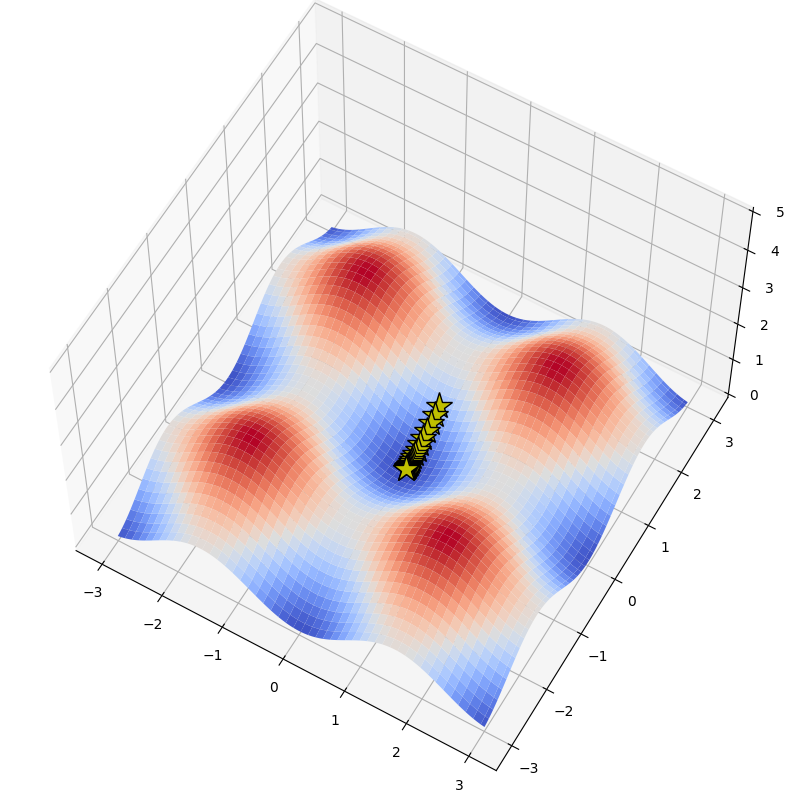

In [21]:
# Импорт необходимых библиотек
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Функция f(x), как было определено ранее
def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    return np.sum(np.sin(x)**2)

# Функция градиента для f(x)
def grad_f(x):
    """
    Градиент функции f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    return 2 * np.sin(x) * np.cos(x)  # или np.sin(2 * x)

# Функция для реализации градиентного спуска
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск к минимуму функции f от двух переменных.
    :param f: скалярная функция двух переменных
    :param grad_f: функция, возвращающая градиент функции f
    :param lr: learning rate (шаг обучения)
    :param num_iter: количество итераций градиентного спуска
    :param x0: начальная точка для спуска (если не указана, будет случайная)
    :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)  # случайная начальная точка, если не задана

    history = []  # для хранения шагов спуска
    curr_x = x0.copy()

    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))  # сохраняем текущее значение
        history.append(entry)
        curr_x -= lr * grad_f(curr_x)  # шаг градиентного спуска

    return np.vstack(history)  # возвращаем историю всех шагов

# Запуск градиентного спуска
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

# Построение 3D-визуализации поверхности функции и пути градиентного спуска
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))

# Создание 3D осей
ax = fig.add_subplot(111, projection='3d')

# Вычисление значений функции на сетке X, Y
zs = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

# Построение поверхности функции
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

# Добавление пути градиентного спуска на график
ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3,
        markerfacecolor='y', lw=3, c='black')

# Настройки осей и отображение графика
ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

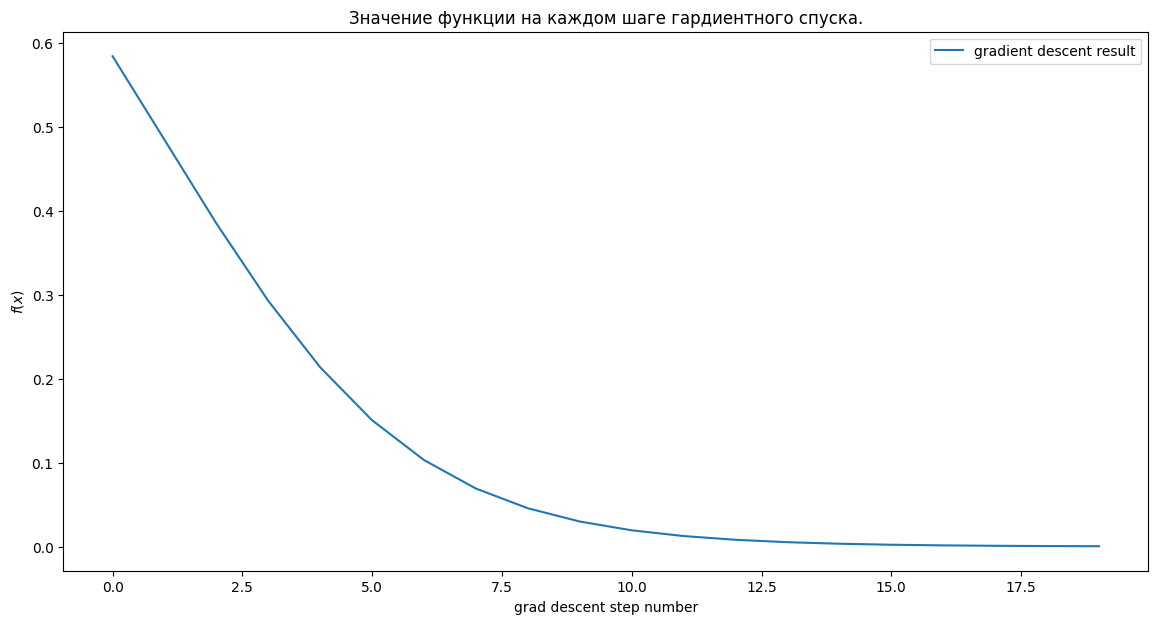

In [22]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

Когда вы используете градиентный спуск всегда нужно проверять, сошелся ли он. К сожалению для большинства моделей не получится построить 3D график, поэтому обязательно нужно смотреть на то, как менялся лосс на каждом шаге градиентного спуска.

# Генератор батчей

Обычно генерация батчей отличается от той, которую мы использовали в семинаре. Мы выбирали *batch_size* случайных строчек на каждом шаге, но у такого подхода есть минусы. Основной заключается в том, что некоторые строчки из обучающего датасета могут попадаться значительно реже, чем другие.

Чтобы это исправить обучение делят на эпохи. Мы хотим, чтобы в течение одной эпохи модель обучилась на каждом примере один раз. Для этого нужно перемешать строчки в датасете и каждый раз брать очередные *batch_size* строчек.

Может так получится, что размер датасета не делится на *batch_size*, тогда последний батч будет состоять из нескольких последних строк и его размер будет меньше, чем *batch_size*. Такой батч иногда выкидывают и просто не используют. Именно так вам нужно поступить в этом задании.

## Задание 2

Напишите генератор батчей, который будет принимать на вход признаки, ответы и размер батча. Генератор должен возвращать tuple из ($X_{batch}$, $y_{batch}$). Если размер датасета не делится на batch_size, то **последний маленький батч возвращать не нужно**.

Подробнее про Python генераторы можно прочитать здесь:

[Документация](https://wiki.python.org/moin/Generators)

[Описание на русском](https://pythoner.name/list-generator)

Чтобы не перемешивать сам датасет воспользуйтесь np.random.permutation(len(X))


In [23]:
def batch_generator(X, y, batch_size):
    """
    Генератор батчей.
    :param X: np.array, признаки (размерностью [n_samples, n_features])
    :param y: np.array, ответы (размерностью [n_samples])
    :param batch_size: int, размер батча
    :return: tuple (Xbatch, ybatch) для каждого батча
    """
    n_samples = X.shape[0]  # общее количество образцов

    # Проходим по датасету с шагом batch_size
    for i in range(0, n_samples - n_samples % batch_size, batch_size):
        Xbatch = X[i:i + batch_size]  # берем batch_size примеров из X
        ybatch = y[i:i + batch_size]  # берем batch_size ответов из y
        yield Xbatch, ybatch  # возвращаем батч

# Пример использования генератора батчей
import numpy as np

# Примерные данные
X = np.random.rand(100, 10)  # 100 образцов с 10 признаками
y = np.random.randint(0, 2, size=100)  # 100 бинарных меток

# Создаем генератор с batch_size = 20
generator = batch_generator(X, y, batch_size=20)

# Проходим по батчам и выводим их размер
for Xbatch, ybatch in generator:
    print("Batch X shape:", Xbatch.shape)
    print("Batch y shape:", ybatch.shape)

Batch X shape: (20, 10)
Batch y shape: (20,)
Batch X shape: (20, 10)
Batch y shape: (20,)
Batch X shape: (20, 10)
Batch y shape: (20,)
Batch X shape: (20, 10)
Batch y shape: (20,)
Batch X shape: (20, 10)
Batch y shape: (20,)


### Тестируем написанную функцию

Проверим, что наш генератор батчей перемешивает датасет и каждый элемент встречается один раз:

In [26]:
def generate_batches(X, y, batch_size, shuffle=True):
    """
    Генератор батчей с перемешиванием данных.
    :param X: np.array, признаки (размерностью [n_samples, n_features])
    :param y: np.array, ответы (размерностью [n_samples])
    :param batch_size: int, размер батча
    :param shuffle: bool, если True - перемешивает датасет перед разделением на батчи
    :return: tuple (Xbatch, ybatch) для каждого батча
    """
    n_samples = X.shape[0]

    # Опциональное перемешивание данных
    if shuffle:
        indices = np.random.permutation(n_samples)  # перемешиваем индексы
        X = X[indices]
        y = y[indices]

    # Генерация батчей
    for i in range(0, n_samples - n_samples % batch_size, batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield X_batch, y_batch

Попробуем теперь *batch_size* не делящий размер датасета.

In [27]:
def generate_batches(X, y, batch_size, shuffle=True):
    """
    Генератор батчей с перемешиванием данных.
    :param X: np.array, признаки (размерностью [n_samples, n_features])
    :param y: np.array, ответы (размерностью [n_samples])
    :param batch_size: int, размер батча
    :param shuffle: bool, если True - перемешивает датасет перед разделением на батчи
    :return: tuple (Xbatch, ybatch) для каждого батча
    """
    n_samples = X.shape[0]

    # Опциональное перемешивание данных
    if shuffle:
        indices = np.random.permutation(n_samples)  # перемешиваем индексы
        X = X[indices]
        y = y[indices]

    # Генерация батчей
    for i in range(0, n_samples - n_samples % batch_size, batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield X_batch, y_batch

# Обычная логистическая регрессия
В этом пункте вы напишете класс логистической регрессии. Пока мы не будем добавлять в функцию потерь регуляризационные слагаемые.

Вам необходимо будет воспользоваться оптимизацией с помощью SGD, используя генератор батчей, который вы написали выше.

## Задание 3
Реализуйте методы ``fit`` и ``get_grad`` класса ``MyLogisticRegression``.


Напоминаем формулы:

$$Loss(y, p) = -\sum_{i=1}^{\ell} (y_i \log (p_i) + (1 - y_i) \log (1 - p_i))$$


$$ \frac{\partial L}{\partial w} = X^T (p - y)$$


In [28]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [31]:
import numpy as np

def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

def generate_batches(X, y, batch_size, shuffle=True):
    """
    Генератор батчей с перемешиванием данных.
    :param X: np.array, признаки (размерностью [n_samples, n_features])
    :param y: np.array, ответы (размерностью [n_samples])
    :param batch_size: int, размер батча
    :param shuffle: bool, если True - перемешивает датасет перед разделением на батчи
    :return: tuple (Xbatch, ybatch) для каждого батча
    """
    n_samples = X.shape[0]

    # Опциональное перемешивание данных
    if shuffle:
        indices = np.random.permutation(n_samples)  # перемешиваем индексы
        X = X[indices]
        y = y[indices]

    # Генерация батчей
    for i in range(0, n_samples - n_samples % batch_size, batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield X_batch, y_batch

class MyLogisticRegression(object):
    def __init__(self):
        self.w = None

    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        l, n = X.shape
        if self.w is None:
            np.random.seed(42)
            # Инициализируем вектор весов случайными числами
            self.w = np.random.randn(n + 1)

        # Добавляем вектор единиц к X (для bias term)
        X_train = np.concatenate((np.ones((l, 1)), X), axis=1)

        losses = []

        # Оптимизация по эпохам
        for epoch in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                # Предсказания на текущем батче
                predictions = sigmoid(logit(X_batch, self.w))

                # Вычисляем лосс на текущем батче
                loss = self.__loss(y_batch, predictions)
                assert isinstance(loss, float), "Лосс должен быть скаляром!"
                losses.append(loss)

                # Обновление весов по формуле градиентного спуска
                grad = self.get_grad(X_batch, y_batch, predictions)
                self.w -= lr * grad  # Обновляем веса

        return losses

    def get_grad(self, X_batch, y_batch, predictions):
        """
        Вычисляет градиент функции потерь для логистической регрессии.
        """
        error = predictions - y_batch
        grad_basic = X_batch.T @ error
        assert grad_basic.shape == (X_batch.shape[1],), "Градиент должен быть вектором с (n_features + 1) элементами"
        return grad_basic

    def predict_proba(self, X):
        l, n = X.shape
        X_ = np.concatenate((np.ones((l, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.w.copy()

    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Пример использования
# X, y - ваши данные
# model = MyLogisticRegression()
# losses = model.fit(X, y, epochs=10, lr=0.1, batch_size=32)
# predictions = model.predict(X)

### Тестируем написанную функцию


In [32]:
m = MyLogisticRegression()
X = np.array([[1, 3, 4], [1, -5, 6], [-3, 5, 3]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([1, 0, 1])
preds = np.array([.55, .22, .85])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([-0.38,  0.22, -3.2 , -0.93])), "Что-то не так!"

In [33]:
np.random.seed(42)
m = MyLogisticRegression()
X = np.random.rand(100,3)
y = np.random.randint(0, 1, size=(100,))
preds = np.random.rand(100)
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([23.8698149, 25.27049356, 24.4139452])), "Что-то не так!"

# Логистическая регрессия с $l_1$ и $l_2$ регуляризацией (elastic net).

Ваша задача -- написать класс логистической регрессии с обеими регуляризациями и оптимизацией с помощью SGD, используя генератор батчей, который вы написали выше.

Обратите внимание, что реализация ElasticNet отличается от реализации LogisticRegression только функцией потерь для оптимизации. Поэтому единственная функция, которая будет отличаться у двух методов, это ``self.get_grad()``.

Поэтому в данном случае естественно применить паттерн *наследования*. Весь синтаксис наследования мы прописали за вас. Единственное, что вам осталось сделать, это переопределить метод ``get_grad()`` в отнаследованном классе.

## Задание 4
Реализуйте метод ``get_grad()`` класса ``MyElasticLogisticRegression``

Формулы:

$$L_1 (w) = \alpha \sum_{j=1}^{n}|w_j| $$

$$L_2 (w) = \beta\sum_{j=1}^{n}w_j^2$$

$$\frac{\partial L_1}{\partial w_1} = \alpha \cdot \mathrm{sign}(w_1)$$

$$ \frac{\partial L_2}{\partial w_1} = 2\beta w_1$$


In [34]:
class MyElasticLogisticRegression(MyLogisticRegression):
    def __init__(self, l1_coef, l2_coef):
        super().__init__()
        self.l1_coef = l1_coef  # коэффициент для L1 регуляризации (Lasso)
        self.l2_coef = l2_coef  # коэффициент для L2 регуляризации (Ridge)
        self.w = None

    def get_grad(self, X_batch, y_batch, predictions):
        """
        Вычисляет градиент логистической регрессии с регуляризацией ElasticNet.
        Вход:
        - X_batch: матрица признаков с добавленной колонкой единиц (bias)
        - y_batch: целевые переменные для батча
        - predictions: предсказанные вероятности классов для батча

        Возвращает:
        - Вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """

        # Основной градиент логистической регрессии без регуляризации
        error = predictions - y_batch
        grad_basic = X_batch.T @ error  # (n_features + 1) градиент по всем весам включая bias

        # Градиент L1-регуляризации: alpha * sign(w)
        grad_l1 = self.l1_coef * np.sign(self.w)
        grad_l1[0] = 0  # не регуляризируем bias (нулевой элемент)

        # Градиент L2-регуляризации: 2 * beta * w
        grad_l2 = 2 * self.l2_coef * self.w
        grad_l2[0] = 0  # не регуляризируем bias (нулевой элемент)

        # Итоговый градиент — это сумма всех компонентов
        grad_total = grad_basic + grad_l1 + grad_l2

        return grad_total

### Тестирование
Протестируем написанную функцию:


In [35]:
m = MyElasticLogisticRegression(.2,.2)
X = np.array([[1, 3, 4], [1, -5, 6], [-3, 5, 3]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([1, 0, 1])
preds = np.array([.55, .22, .85])
m.w = np.array([1,1,1,1])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([-0.38,  0.82, -2.6 , -0.33])), "Что-то не так!"


In [36]:
np.random.seed(42)
m = MyElasticLogisticRegression(.2, .2)
X = np.random.rand(100,3)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.random.randint(0, 1, size=(100,))
preds = np.random.rand(100)
m.w = np.array([1,1,1,1])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([49.11489408, 24.4698149, 25.87049356, 25.0139452])), "Что-то не так!"


## Смотрим, как работает наша модель
Протестируем на искусственных данных:

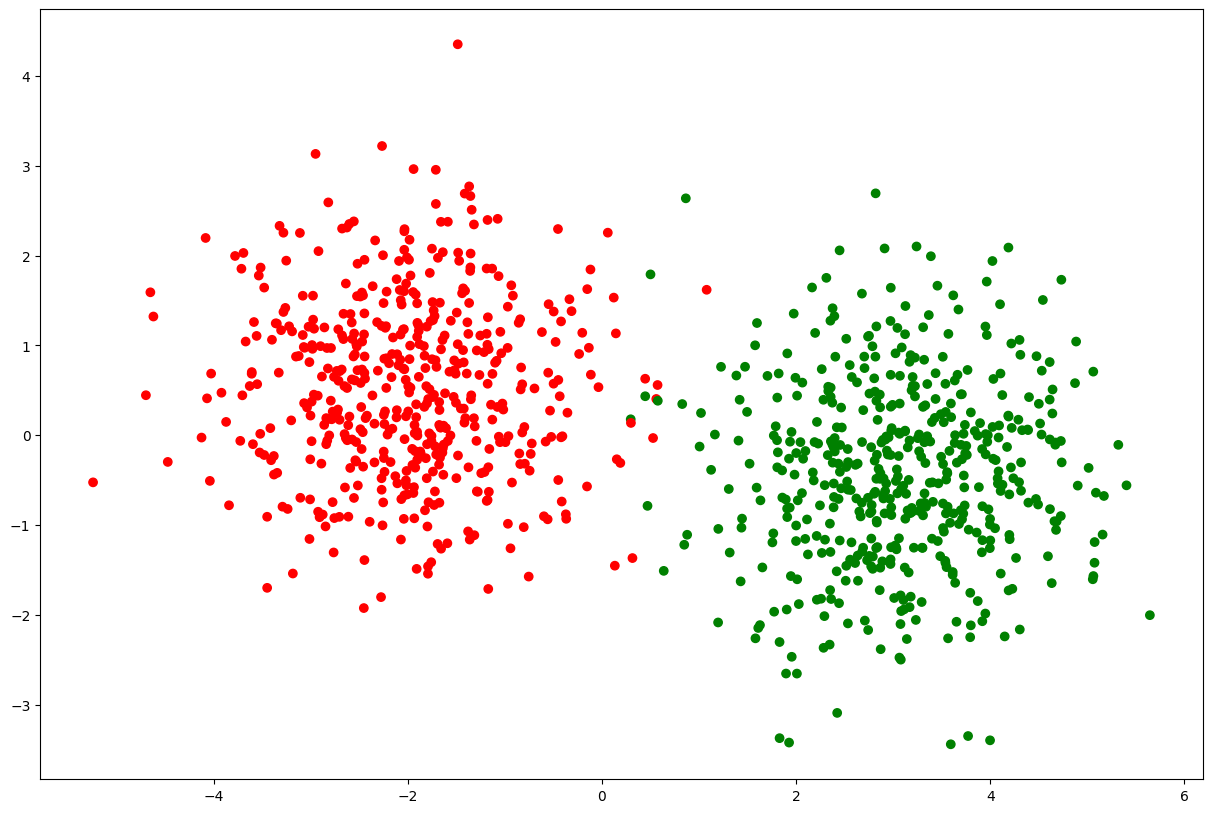

In [37]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)
#y = y.reshape(-1, 1)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [38]:
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)
w = clf.get_weights()

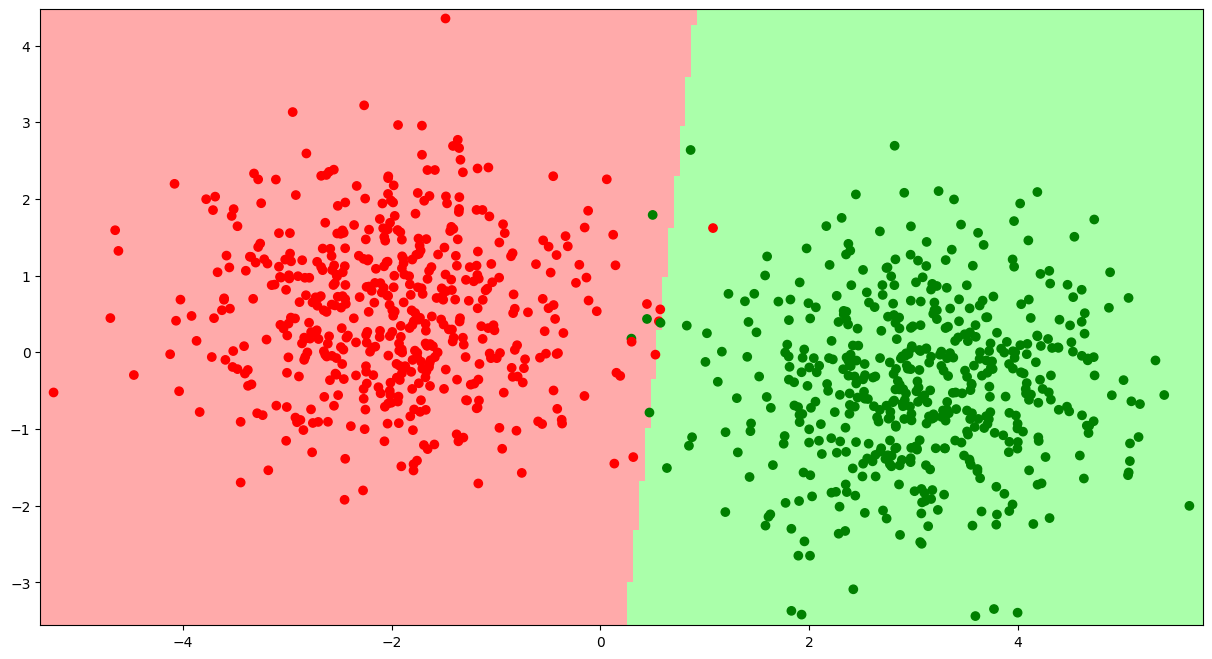

In [39]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Теперь протестируем на датасете MNIST. Это очень простой класический датасет, на котором часто тестируются модели. С помощью нейронных сетей люди научились получать на нем качество 99.84%.

Датасет состоит из черно-белых картинок с цифрами. ![mnist-3.0.1.png](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Так как мы сделали классификатор для двух классов, то мы выберем из всех картинок только картинки 0 и 1, првратим их из двумерной матрицы в вектор и обучим нашу модель.

In [51]:
data = pd.read_csv('/content/sample_data/mnist_test.csv')
#файл лежит в директории с домашним заданием. Чтобы иметь возможность его
#открыть, загрузите его на колаб (панель слева, нажимаем значок "Файлы",
#выбираем "загрузить в сессионное хранилище", выбираем нужный файл)
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Данные выглядят как таблица, первая колонка которой это лейбел -- цифра, которая изображена на картинке, а следующие 784 колонки это значения от 0 до 255, описывающие все пиксели картинки 28х28. То есть нам не придется делать reshape и превращать матрицу в вектор, так как это уже сделано.

In [52]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Выберем только картинки, где изображен 0 и 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

Для оценки модели мы используем кросс валидацию.

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Предположим, что у вас уже есть класс MyElasticLogisticRegression
class MyElasticLogisticRegression(MyLogisticRegression):
    def __init__(self, l1_coef, l2_coef):
        super().__init__()
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef

    def get_grad(self, X_batch, y_batch, predictions):
        error = predictions - y_batch
        grad_basic = X_batch.T @ error

        grad_l1 = self.l1_coef * np.sign(self.w)
        grad_l1[0] = 0  # Не регуляризируем bias

        grad_l2 = 2 * self.l2_coef * self.w
        grad_l2[0] = 0  # Не регуляризируем bias

        return grad_basic + grad_l1 + grad_l2

# Создаем данные для классификации
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Создаем модель MyElasticLogisticRegression с L1 и L2 регуляризацией
model = MyElasticLogisticRegression(l1_coef=0.1, l2_coef=0.1)

# Создаем pipeline с StandardScaler и MyElasticLogisticRegression
pipeline = make_pipeline(StandardScaler(), model)

# Выполняем кросс-валидацию с использованием accuracy
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Рассчитываем среднюю точность
mean_accuracy = scores.mean()

print(f"Mean accuracy of Logistic Regression for two classes is {mean_accuracy:.4f}")

Mean accuracy of Logistic Regression for two classes is 0.8230
